In [1]:
#ds lab cycle 3

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tr=pd.read_csv('data3.csv')
tr

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
124,1,5,2,4,4,2,3
125,0,5,3,3,4,4,5
126,0,5,3,3,4,4,4
127,0,3,2,3,3,5,4


In [4]:
total=tr.shape[0]
total

129

In [5]:
frqzero=tr['D'][tr['D']==0].count()
frqzero

59

In [6]:
frqone=tr['D'][tr['D']==1].count()
frqone

70

In [7]:
perzero=frqzero/total
perzero

0.4573643410852713

In [8]:
perone=frqone/total
perone

0.5426356589147286

In [9]:
czero=np.zeros((5,6))
czero

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
cone=np.zeros((5,6))
cone

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [11]:
tr['X1'][tr['D']==1][tr['X1']==3].count()

7

In [12]:
tr.X1.value_counts()

5    62
4    43
3    23
1     1
Name: X1, dtype: int64

In [13]:
tr.X2.value_counts()


3    40
2    37
1    28
4    18
5     6
Name: X2, dtype: int64

In [14]:
tr.X3.value_counts()

3    59
4    33
2    16
5    15
1     6
Name: X3, dtype: int64

In [15]:
tr.X4.value_counts()

4    51
3    48
5    23
2     6
1     1
Name: X4, dtype: int64

In [16]:
tr.X5.value_counts()

4    52
5    28
3    26
2    17
1     6
Name: X5, dtype: int64

In [17]:
tr.X6.value_counts()

5    54
4    52
3    21
2     1
1     1
Name: X6, dtype: int64

In [18]:
'X'+str(1)

'X1'

In [47]:
for i in range(0,6):
    for j in range(0,5):
        czero[j][i]=tr['X'+str(i+1)][tr['D']==0][tr['X'+str(i+1)]==j+1].count()
       

TypeError: 'numpy.float64' object does not support item assignment

In [44]:
czero

array([0., 0., 0., 0., 0., 0.])

In [21]:
for i in range(0,6):
    for j in range(0,5):
        cone[j][i]=tr['X'+str(i+1)][tr['D']==1][tr['X'+str(i+1)]==j+1].count()

In [43]:
cone

array([0., 0., 0., 0., 0., 0.])

In [40]:
zeropro=np.zeros((6))
onepro=np.zeros((6))

In [48]:
czero=czero/frqzero
czero

array([0., 0., 0., 0., 0., 0.])

In [27]:
cone=cone/frqone
cone

array([[0.        , 0.00265306, 0.00040816, 0.00020408, 0.00020408,
        0.        ],
       [0.        , 0.00469388, 0.00183673, 0.00020408, 0.00163265,
        0.        ],
       [0.00142857, 0.0044898 , 0.00510204, 0.00489796, 0.0022449 ,
        0.00102041],
       [0.00367347, 0.00163265, 0.00489796, 0.00612245, 0.00612245,
        0.00571429],
       [0.00918367, 0.00081633, 0.00204082, 0.00285714, 0.00408163,
        0.00755102]])

In [28]:
ts=pd.read_csv('test3.csv')
ts


,D,X1,X2,X3,X4,X5,X6
0,0,5,1,4,4,4,5
1,0,5,2,2,4,4,5
2,0,5,3,5,4,5,5
3,1,3,4,4,5,1,3
4,1,5,1,5,5,5,5
5,1,4,3,3,4,4,4
6,1,5,5,1,1,5,1
7,0,4,4,4,4,1,3
8,1,5,2,3,4,4,3
9,0,5,3,3,1,3,5


In [35]:
ttotal=ts.shape[0]
ttotal

14

In [29]:
xtrain=ts.drop('D',axis=1)
ytrain=ts.loc[:,'D']
xtest=tr.drop('D',axis=1)
ytest=tr.loc[:,'D']


In [30]:
model=GaussianNB()

In [31]:
model.fit(xtrain,ytrain)

GaussianNB()

In [32]:
from sklearn.model_selection import train_test_split
pred= model.predict(xtest)

Text(91.68, 0.5, 'predicted')

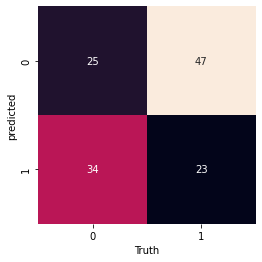

In [33]:
mat=confusion_matrix(pred,ytest)
names=np.unique(pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=names,yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('predicted')

In [36]:
tp=0
tn=0
fp=0
fn=0
for n in range (0,ttotal):
    a=1
    b=1
    for i in range(1,6):
        k=ts.at[n,'x'+str(i)]
        a=a*czero[k-1][i-1]
        b=b*cone[k-1][i-1]
        if i==5:
            break
        a=a*perzero
        b=b*perone
        if(a>b):
            predict=0
        else:
            predict=1
        d=ts.at[n,'D']
        if(d==1 and predict==1):
            tp=tp+1
        elif(d==1 and predict==0):
            tn=tn+1
        elif(d==0 and predict==1):
            fp=fp+1
        else:
            fn=fn+1

KeyError: 'x1'